# <a id='toc1_'></a>[Assignment II](#toc0_)

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})
from HANKModel import create_model

**Table of contents**<a id='toc0_'></a>    
- [Assignment II](#toc1_)    
  - [Q1](#toc1_1_)    
  - [Q2](#toc1_2_)    
  - [Q3](#toc1_3_)    
  - [Q4](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Q1](#toc0_)

Setup

In [34]:
model = create_model(name='baseline', par={'HH_type' : 'HANK'})

Steady state 

In [35]:
model.find_ss(do_print=False)

steady state found in 3.7 secs
 beta =   0.9744
 r    =   0.0200
 B   =   2.6308
Discrepancy in A =   0.00000000
Discrepancy in Y =   0.00000000


In [36]:
model.test_path()

shocks: epsT 
unknowns: pi L B w 

look at max(abs(path.VARNAME[:]-ss.VARNAME)):

 blocks.production
  Y                0.0e+00
  NKPC_res         0.0e+00 [target]
  profits          0.0e+00
 blocks.central_bank
  r                0.0e+00
 blocks.government
  Taxes            0.0e+00
  gov_budget       0.0e+00 [target]
  LT               0.0e+00
 hh
  A_hh             1.5e-09
  C_hh             6.5e-11
  MUC_hh           2.1e-10
 blocks.labor_supply
  labor_supply_res  1.3e-10 [target]
 blocks.market_clearing
  A                0.0e+00
  clearing_A       1.5e-09
  clearing_Y       4.4e-11 [target]


Transition path

In [67]:

epsT_shocks = np.random.normal(0, 0.001, model.par.T)
epsT_shocks = np.zeros(model.par.T)
shock_size = model.ss.Y * 0.01
# epsT_shocks[0] = shock_size
# epsT_shocks[20] = shock_size
# epsT_shocks[40] = shock_size
# epsT_shocks[80] = shock_size

shocks = {'depsT': epsT_shocks}

model.compute_jacs(do_print=False)
model.find_transition_path(shocks=shocks,
                        #    do_print=False, 
                        #    do_end_check=False
                     )

clearing_A: terminal value is   0.00000002, but ss value is   0.00000000


### shocks ###


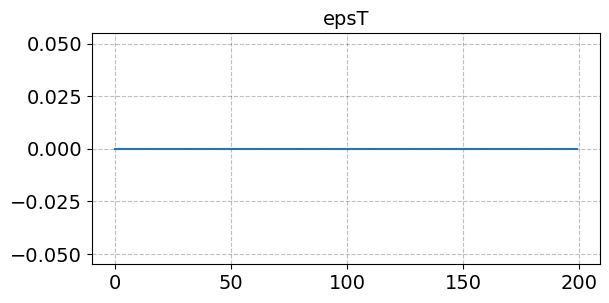


### varnames ###


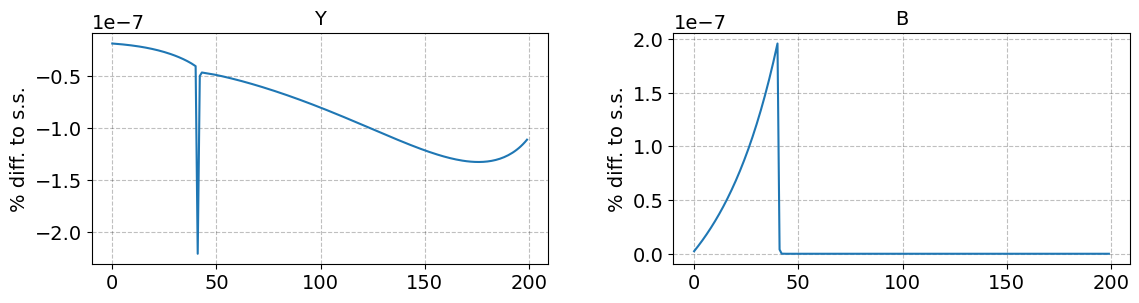


### tagets ###


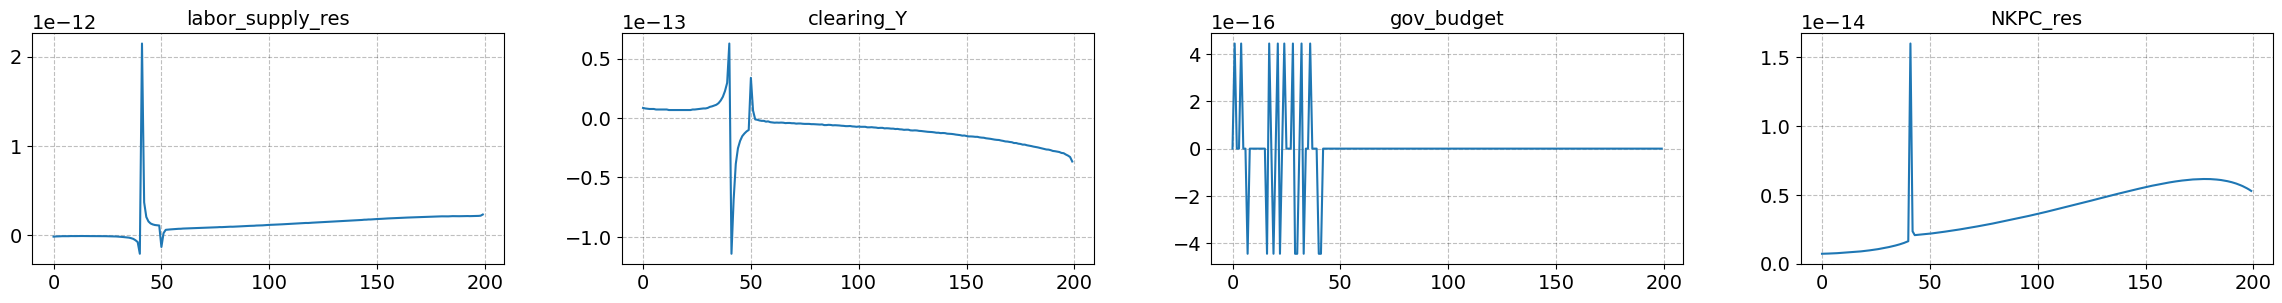

In [68]:
model.show_IRFs(['Y', 'B'], 
                lvl_value='epsT',
                 do_shocks=True
                 )

## <a id='toc1_2_'></a>[Q2](#toc0_)

Setup

In [ ]:
model_TANK = create_model(name='TANK', par={'HH_type' : 'TANK'})

Steady state

In [ ]:
model_TANK.par.B_target_ss = ...
model_TANK.par.beta = ...
model_TANK.find_ss(calibrate=False)

In [ ]:
model_TANK.test_path() # Remember: You need to update blocks.py for the TANK model 

## <a id='toc1_3_'></a>[Q3](#toc0_)

HANK model with low tax rate

In [ ]:
model_low_tau = model.copy() 
model_low_tau.par.tau = 0.05
model_low_tau.find_ss(do_print=False, x0=[0.967, 2.341])

In [ ]:
model_low_tau.test_path()

## <a id='toc1_4_'></a>[Q4](#toc0_)